In [ ]:
import pandas as pd
import os 
import sys

sys.path.insert(1, os.path.join(os.path.dirname(os.getcwd()), "scripts") )

import statistical_tests as st


We selected the time series manually. We took the following criteria into account:
* Time stamp as index
* Already cleaned data
* more than one year of data

Now we'll explore the shape of the time series. 

In [22]:
# functionalities
def explore_timeseries(table: pd.DataFrame, ycolname: str, period: int=365, model: str="additive"):
    print("Decomposition:")
    _ = st.seasonal_decompose_plot(table, colname= ycolname, period=period, model=model)
    
    print("Auto correlation test:")
    _,_ = st.test_autocorrelation(table, colname=ycolname, lags=period)
    
    print("Stationarity test:")
    _ = st.test_stationarity(table, colname=ycolname)
    

In [4]:
root_path = os.path.dirname(os.getcwd())
data_path = os.path.join(root_path, "data", "forecasting")


Data1 - Bitcoin price 

        date  bitcoin_price
0 2009-01-03            1.0
1 2009-01-04            1.0
2 2009-01-05            1.0
3 2009-01-06            1.0
4 2009-01-07            1.0


<Axes: xlabel='date'>

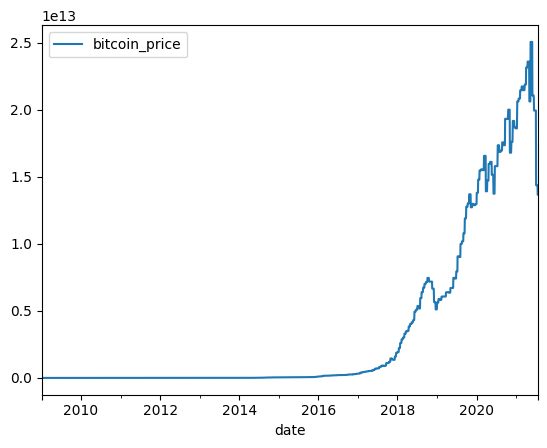

In [10]:
filename = "bitcoin_dataset_without_missing_values_1.csv"

# read filename with date column as datetype
df = pd.read_csv(os.path.join(data_path, filename), parse_dates=["date"])
df = df.drop("cols", axis=1)
df.rename(columns={"data": "bitcoin_price"}, inplace=True)

print(df.head())

df.plot(kind="line", x="date", y="bitcoin_price")

Decomposition:


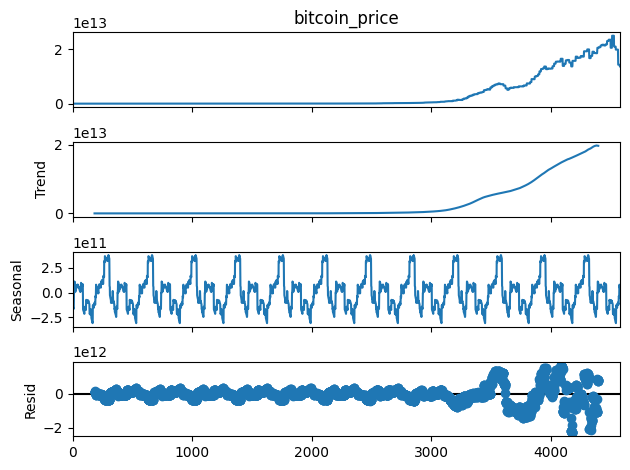

Auto correlation test:
Reject H0, thus the data is correlated. Ljung-Box statistic: 1110552.0877242691, p-value: 0.0
Stationarity test:
Accept H0, thus the data is not stationary. ADF statistic: -0.04095804348673038, p-value: 0.9550109450233186


In [11]:
explore_timeseries(df, xcolname="date", ycolname="bitcoin_price", period=365, model="additive")

In [13]:
df.to_csv(os.path.join(root_path, "data", "bitcoin_values.csv"), index=False)

data2 - Covid-19 cases

        date  covid_new_cases
0 2020-01-03                0
1 2020-01-04                0
2 2020-01-05                0
3 2020-01-06                0
4 2020-01-07                0


<Axes: xlabel='date'>

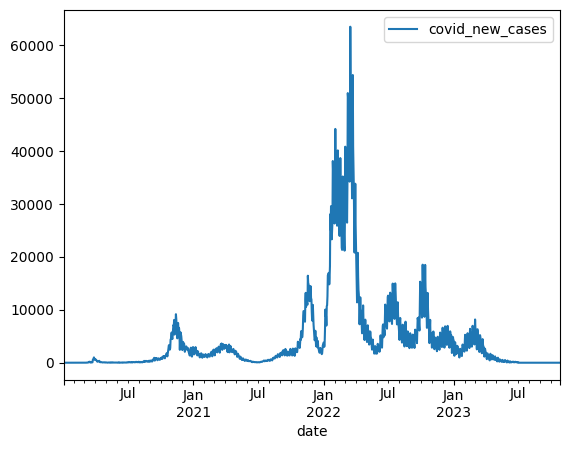

In [14]:
filename = "Covid-19.csv"
df = pd.read_csv(os.path.join(data_path, filename), parse_dates=["date"], sep=",")
df[['country', 'case_type']] = df["cols"].str.split(";", expand=True)

filtered_df = df[(df["country"]== "Austria") & (df["case_type"]== "New_cases")].copy()
filtered_df = filtered_df.reset_index().drop(["index", "cols", "country", "case_type"], axis=1)
filtered_df.rename(columns={"data": "covid_new_cases"}, inplace=True)

print(filtered_df.head())

filtered_df.plot(kind="line", x="date", y="covid_new_cases")

Decomposition:


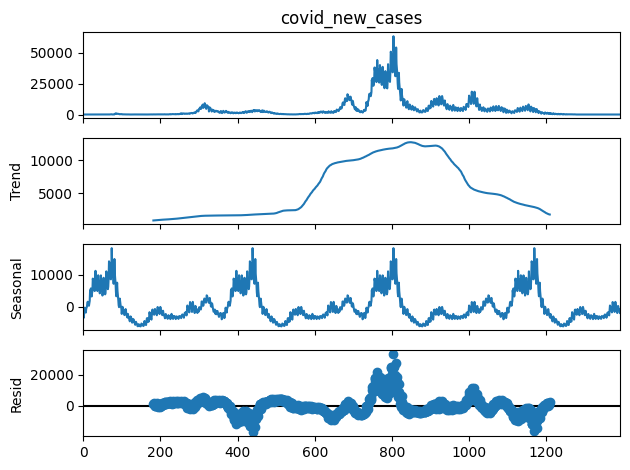

Auto correlation test:
Reject H0, thus the data is correlated. Ljung-Box statistic: 43055.49049870541, p-value: 0.0
Stationarity test:
Accept H0, thus the data is not stationary. ADF statistic: -2.599641755164321, p-value: 0.09307133196838202


In [23]:
explore_timeseries(filtered_df, ycolname="covid_new_cases", period=365, model="additive")


In [24]:
df.to_csv(os.path.join(root_path, "data", "covid_values.csv"), index=False)

data3 - Electricity

         date  electricity
0  2012-01-01   12275144.0
1  2012-01-02   18225876.0
2  2012-01-03   18244919.0
3  2012-01-04   18311261.0
4  2012-01-05   18362412.0


<Axes: xlabel='date'>

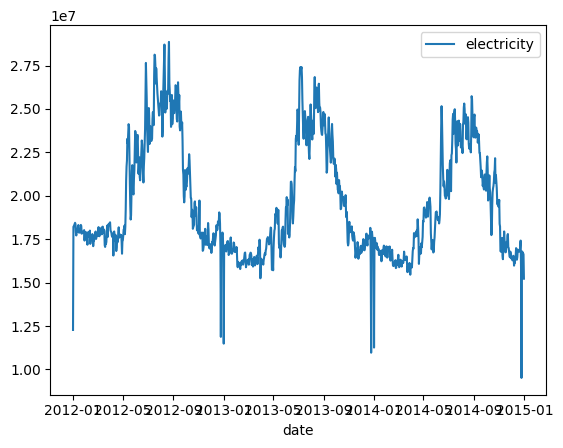

In [38]:
filename = "Electricity.csv"
df = pd.read_csv(os.path.join(data_path, filename), parse_dates=["date"])
df = df.drop("cols", axis=1)
df. rename(columns={"data": "electricity"}, inplace=True)

daily = df.groupby(df.date.dt.date)["electricity"].sum().reset_index()

print(daily.head())

daily.plot(kind="line", x="date", y="electricity")


Decomposition:


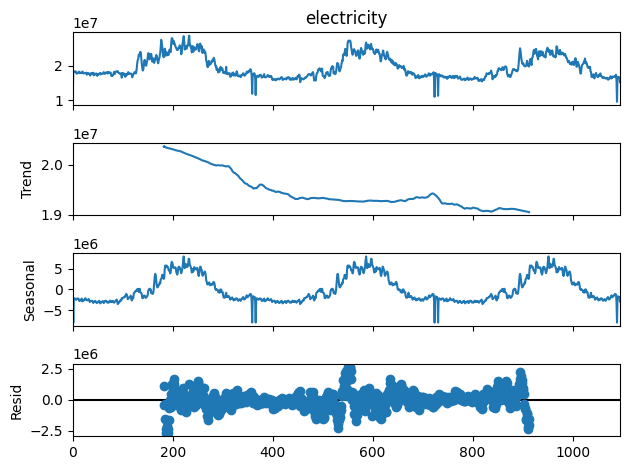

Auto correlation test:
Reject H0, thus the data is correlated. Ljung-Box statistic: 96434.56482155246, p-value: 0.0
Stationarity test:
Accept H0, thus the data is not stationary. ADF statistic: -2.0378007969932925, p-value: 0.2702485570829527


In [41]:
explore_timeseries(daily, ycolname="electricity", period=365, model="additive")

In [42]:
daily.to_csv(os.path.join(root_path, "data", "electricity_values.csv"), index=False)